# 普通OLS

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

# 导入数据集
diabetes = load_diabetes()

# 定义线性回归器
reg_linear = LinearRegression()

# 训练线性回归器
reg_linear.fit(diabetes.data, diabetes.target)

# 预测结果
y_pred = reg_linear.predict(diabetes.data)

# 计算得分
from sklearn.metrics import r2_score
r2_score(diabetes.target, y_pred)

0.5177484222203498

# 岭回归

## 基础使用

In [7]:
# 测试岭回归
# 加载必要的包
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge

# 读取数据集
diabetes = load_diabetes()

# 定义岭回归器
reg_ridge = Ridge(alpha=1.0)

# 训练岭回归器
reg_ridge.fit(diabetes.data, diabetes.target)

# 预测结果
y_pred_ridge = reg_ridge.predict(diabetes.data)

# 计算得分
from sklearn.metrics import r2_score
r2_score(diabetes.target, y_pred_ridge)

0.45123062774361744

## 调参

In [17]:
# 调参获取最佳岭回归参数
# 加载必要的包
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 读取数据集
diabetes = load_diabetes()

# 分割数据集
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义管道学习器
# 定义标准化器
scaler = StandardScaler()
# 定义岭回归器
reg_ridge = Ridge()
# 定义管道
pipe = Pipeline([
  ('scaler', scaler),
  ('reg_ridge', reg_ridge)
])

# 定义参数范围
param_grid = {
  'reg_ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# 定义网格搜索
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')

# 训练网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
grid_search.best_params_

{'reg_ridge__alpha': 0.01}

In [19]:
# 传入最佳参数训练岭回归器
reg_ridge = grid_search.best_estimator_

# 预测结果
y_pred = reg_ridge.predict(X_test)

# 计算得分
r2_score(y_test, y_pred)

0.5078280949999768

In [28]:
reg_ridge

Pipeline(steps=[('scaler', StandardScaler()), ('reg_ridge', Ridge(alpha=0.01))])

In [30]:
# 传入最佳参数训练岭回归器
reg_ridge["scaler"]

StandardScaler()

In [ ]:
reg_ridge["reg_ridge"].coef_

# array([  0.48960017, -12.43785048,  25.86543083,  13.46334536,
#        -42.01226194,  23.01204354,   7.91517256,  15.22324543,
#         32.81815141,   5.19663044])

array([  0.48960017, -12.43785048,  25.86543083,  13.46334536,
       -42.01226194,  23.01204354,   7.91517256,  15.22324543,
        32.81815141,   5.19663044])

In [ ]:
cv_result = grid_search.cv_results_
cv_result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_reg_ridge__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

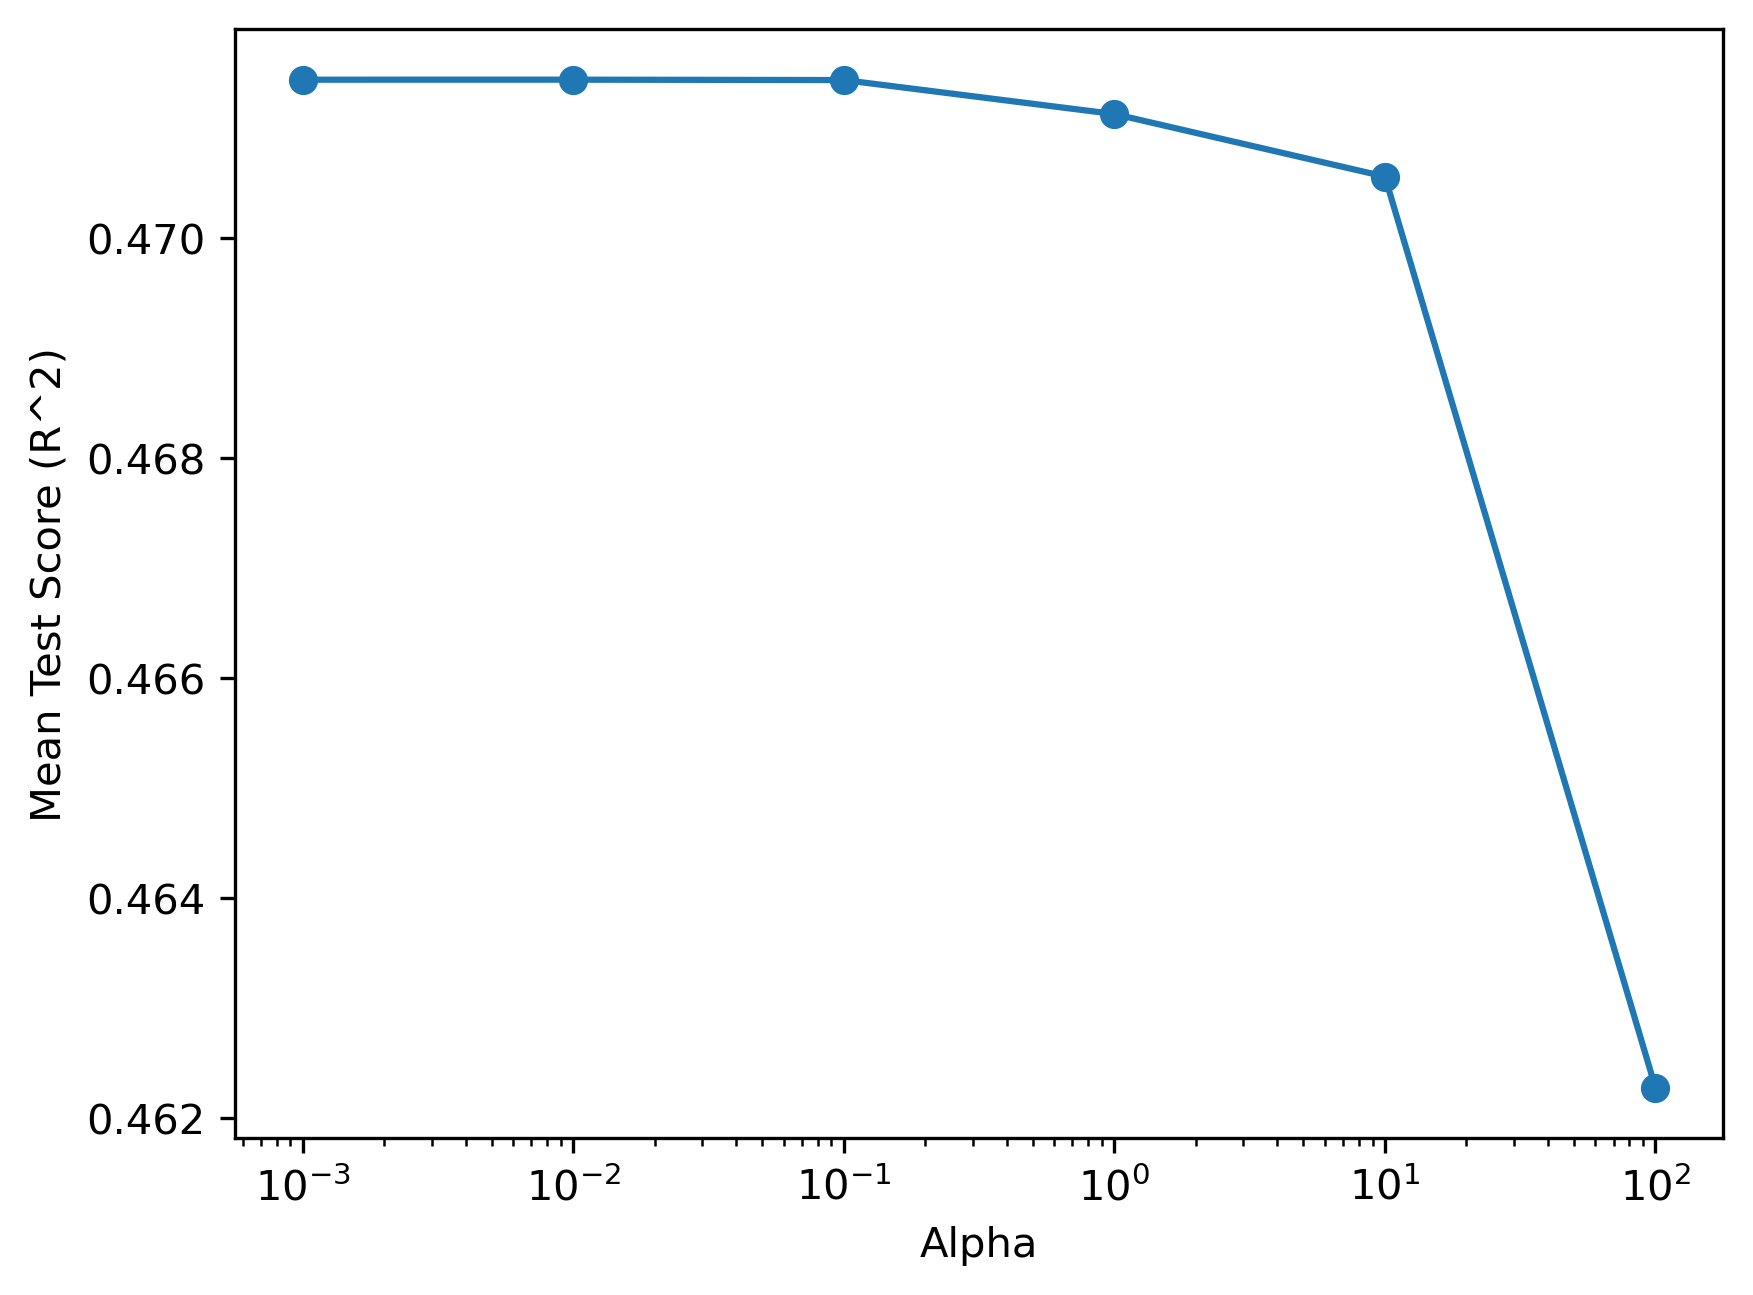

In [37]:
# 手动绘制学习曲线
import matplotlib.pyplot as plt
import numpy as np

# 提取参数和得分
alphas = cv_result['param_reg_ridge__alpha'].data
mean_test_scores = cv_result['mean_test_score']

# 绘制学习曲线
plt.figure(dpi=300)
plt.plot(alphas, mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (R^2)')
plt.show()

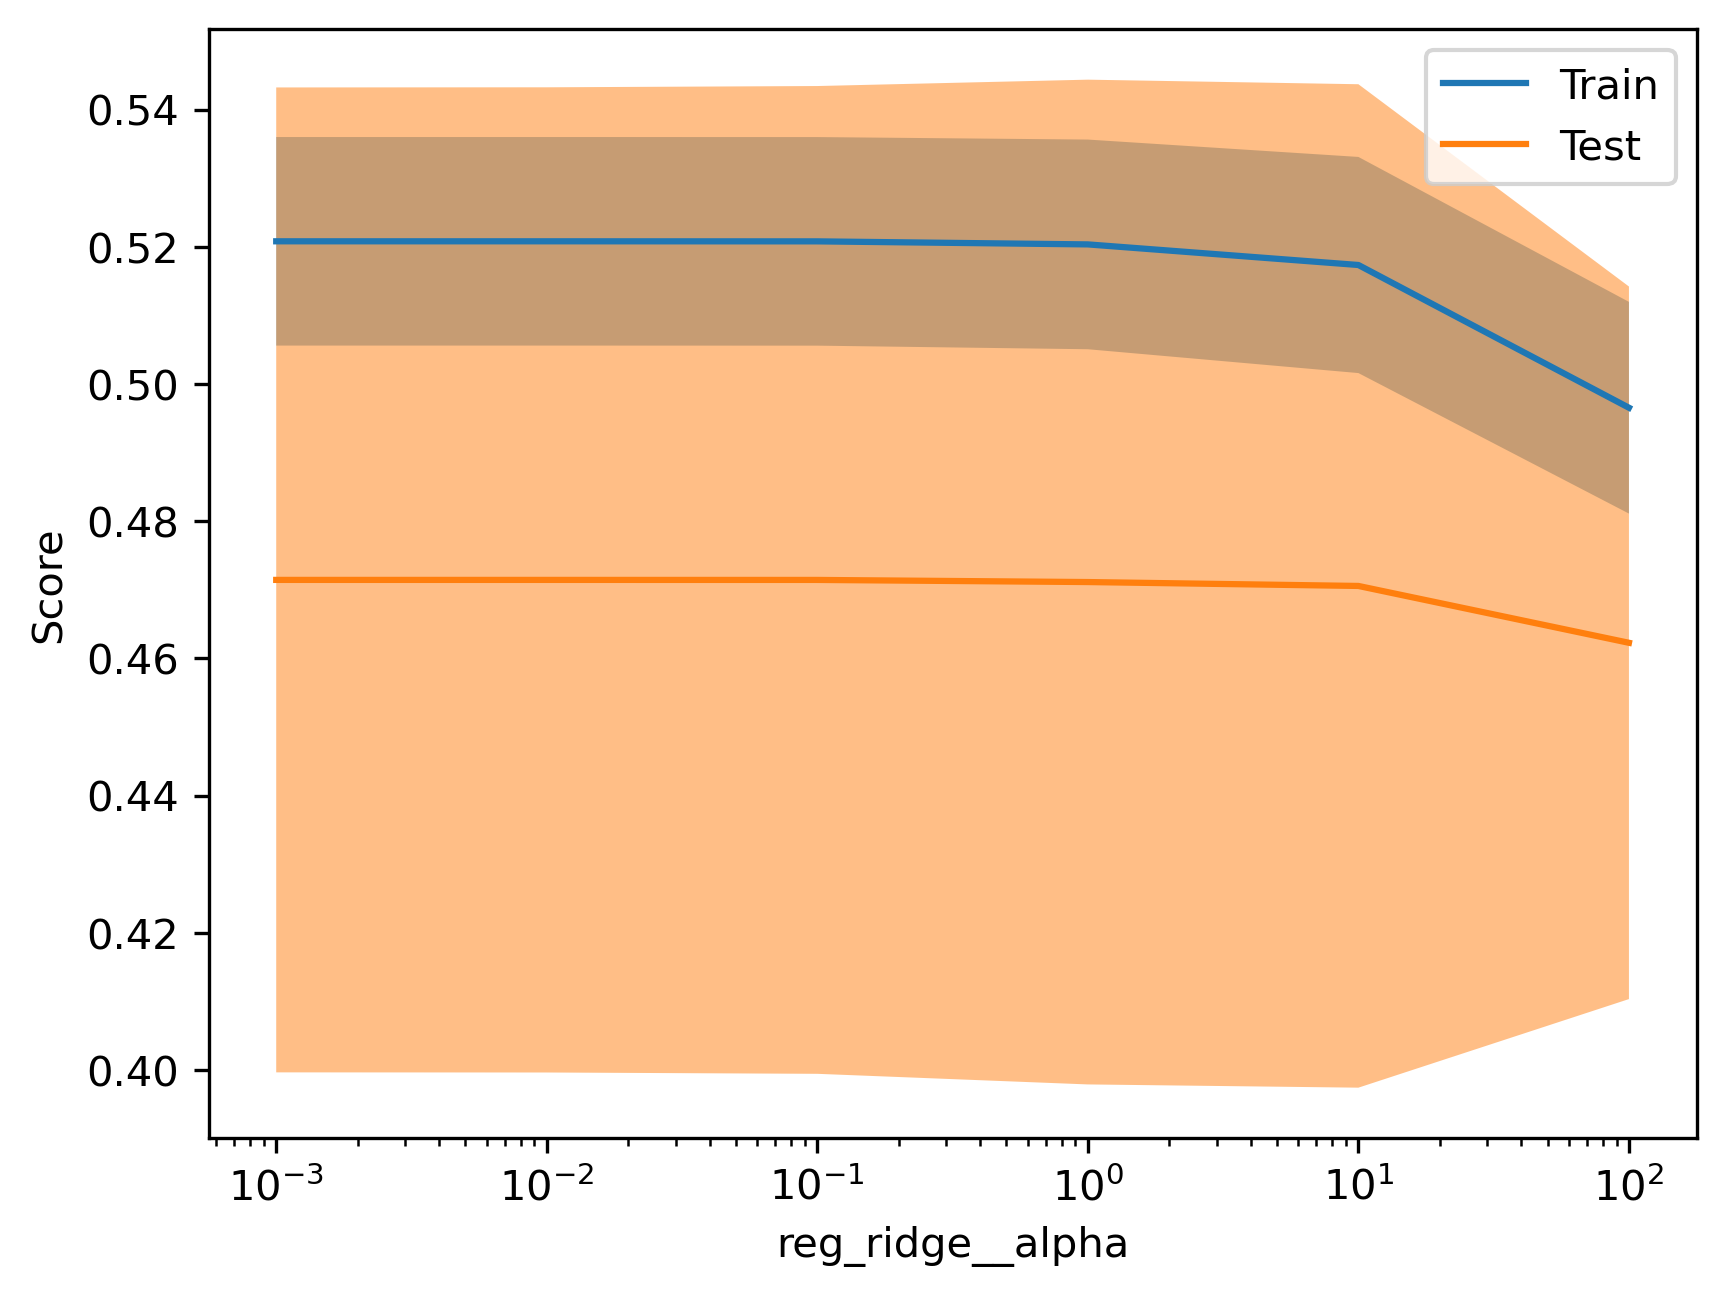

In [43]:
# 使用API绘制验证曲线
from sklearn.model_selection import ValidationCurveDisplay

# 绘制验证曲线
plt.rcParams['figure.dpi'] = 300
ValidationCurveDisplay.from_estimator(
  reg_ridge, X_train, y_train,
  param_name='reg_ridge__alpha',
  param_range=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
)

## 系数图

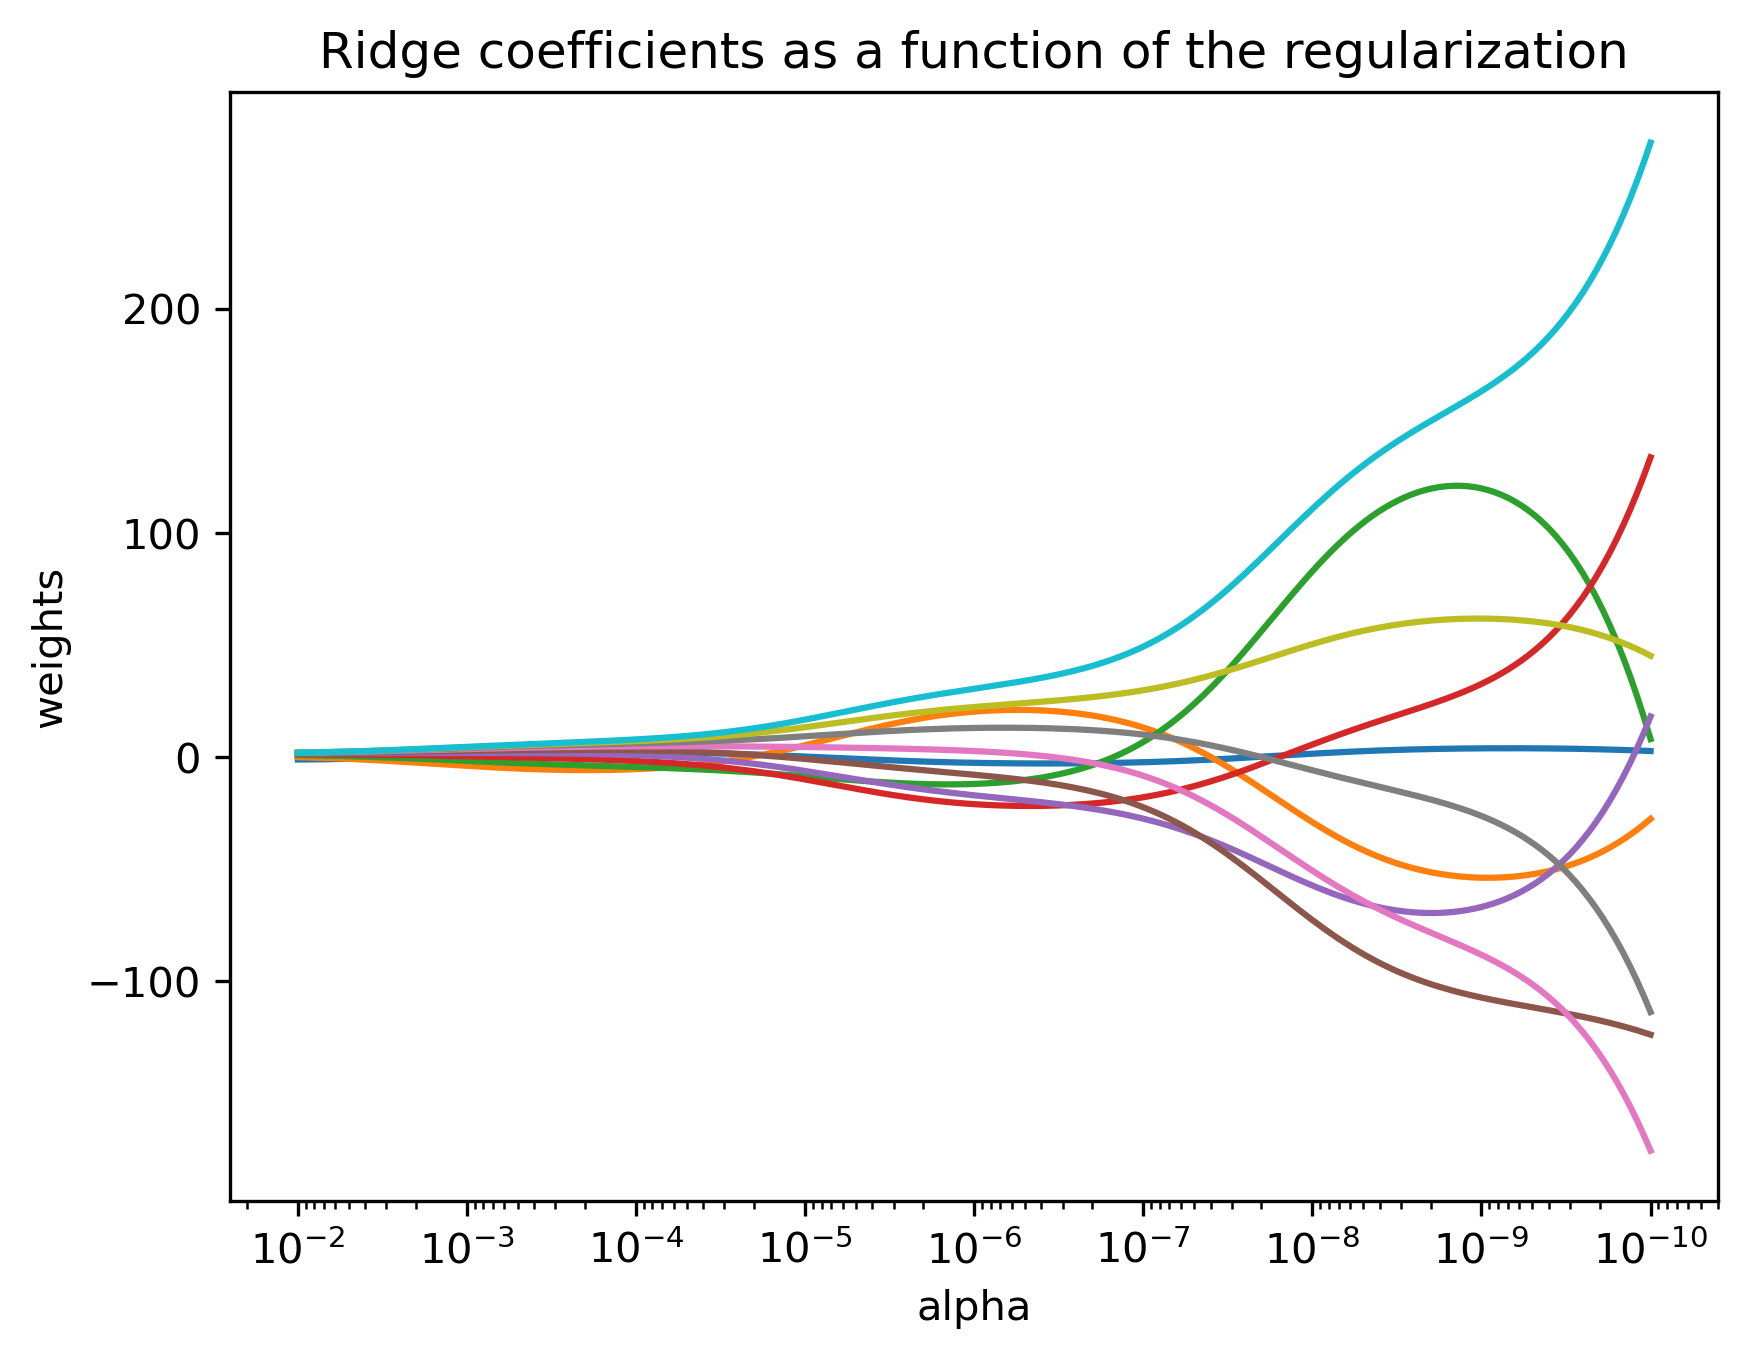

In [44]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

## 分类

In [45]:
# 测试Ridge分类
from sklearn.datasets import load_iris
from sklearn.linear_model import RidgeClassifier
# 读取数据集
iris = load_iris()
# 定义岭分类器
reg_ridge_clf = RidgeClassifier(alpha=1.0)
# 训练岭分类器
reg_ridge_clf.fit(iris.data, iris.target)
# 预测结果
y_pred_clf = reg_ridge_clf.predict(iris.data)
# 计算得分
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, y_pred_clf)

0.8533333333333334

In [46]:
import numpy as np
from sklearn import linear_model

# 1. 定义一个alpha值的范围
# np.logspace(-6, 6, 13) 会生成一个从 1e-6 到 1e+6 的等比数列，共13个数
alphas_to_test = np.logspace(-6, 6, 13)

# 2. 创建 RidgeCV 实例，并传入alpha范围
reg = linear_model.RidgeCV(alphas=alphas_to_test)

# 3. 拟合模型
# 在 .fit() 的过程中，模型会自动执行留一法交叉验证，
# 从 alphas_to_test 中找出最佳的 alpha 值
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

# 4. 查看找到的最佳 alpha 值
print(f"找到的最佳 alpha 值是: {reg.alpha_}")

找到的最佳 alpha 值是: 0.01


# Lasso回归

## 基础使用

In [47]:
# 测试Lasso回归
# 加载必要的包
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

# 读取数据集
diabetes = load_diabetes()

# 定义Lasso回归器
reg_lasso = Lasso(alpha=1.0)

# 训练Lasso回归器
reg_lasso.fit(diabetes.data, diabetes.target)

# 预测结果
y_pred_lasso = reg_lasso.predict(diabetes.data)

# 计算得分
from sklearn.metrics import r2_score
r2_score(diabetes.target, y_pred_lasso)

0.357378738231628

In [ ]:
reg_lasso.coef_

# array([  0.        ,  -0.        , 367.70385976,   6.29885756,
#          0.        ,   0.        ,  -0.        ,   0.        ,
#        307.6054181 ,   0.        ])

array([  0.        ,  -0.        , 367.70385976,   6.29885756,
         0.        ,   0.        ,  -0.        ,   0.        ,
       307.6054181 ,   0.        ])

## 调参

In [2]:
# 测试调参
# 加载必要的包
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# 读取数据集
diabetes = load_diabetes()

# 分割数据集
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义管道学习器
# 定义标准化器
scaler = StandardScaler()
# 定义Lasso回归器
reg_lasso = Lasso(max_iter=10000)  # 增加最大迭代次数以确保收敛
# 定义管道
pipe = Pipeline([
  ('scaler', scaler),
  ('reg_lasso', reg_lasso)
])

# 定义参数范围
param_grid = {
  'reg_lasso__alpha': np.logspace(-10, 1, 12)  # 使用logspace生成从10^-4到10^1的6个数
}

# 定义网格搜索
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

# 训练网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
grid_search.best_params_

{'reg_lasso__alpha': 1e-10}

In [5]:
cv_result = grid_search.cv_results_
cv_result.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_reg_lasso__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [3]:
# 传入目前最佳参数训练Lasso回归器
reg_lasso = grid_search.best_estimator_

# 预测结果
y_pred = reg_lasso.predict(X_test)

# 计算得分
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5078253552825587

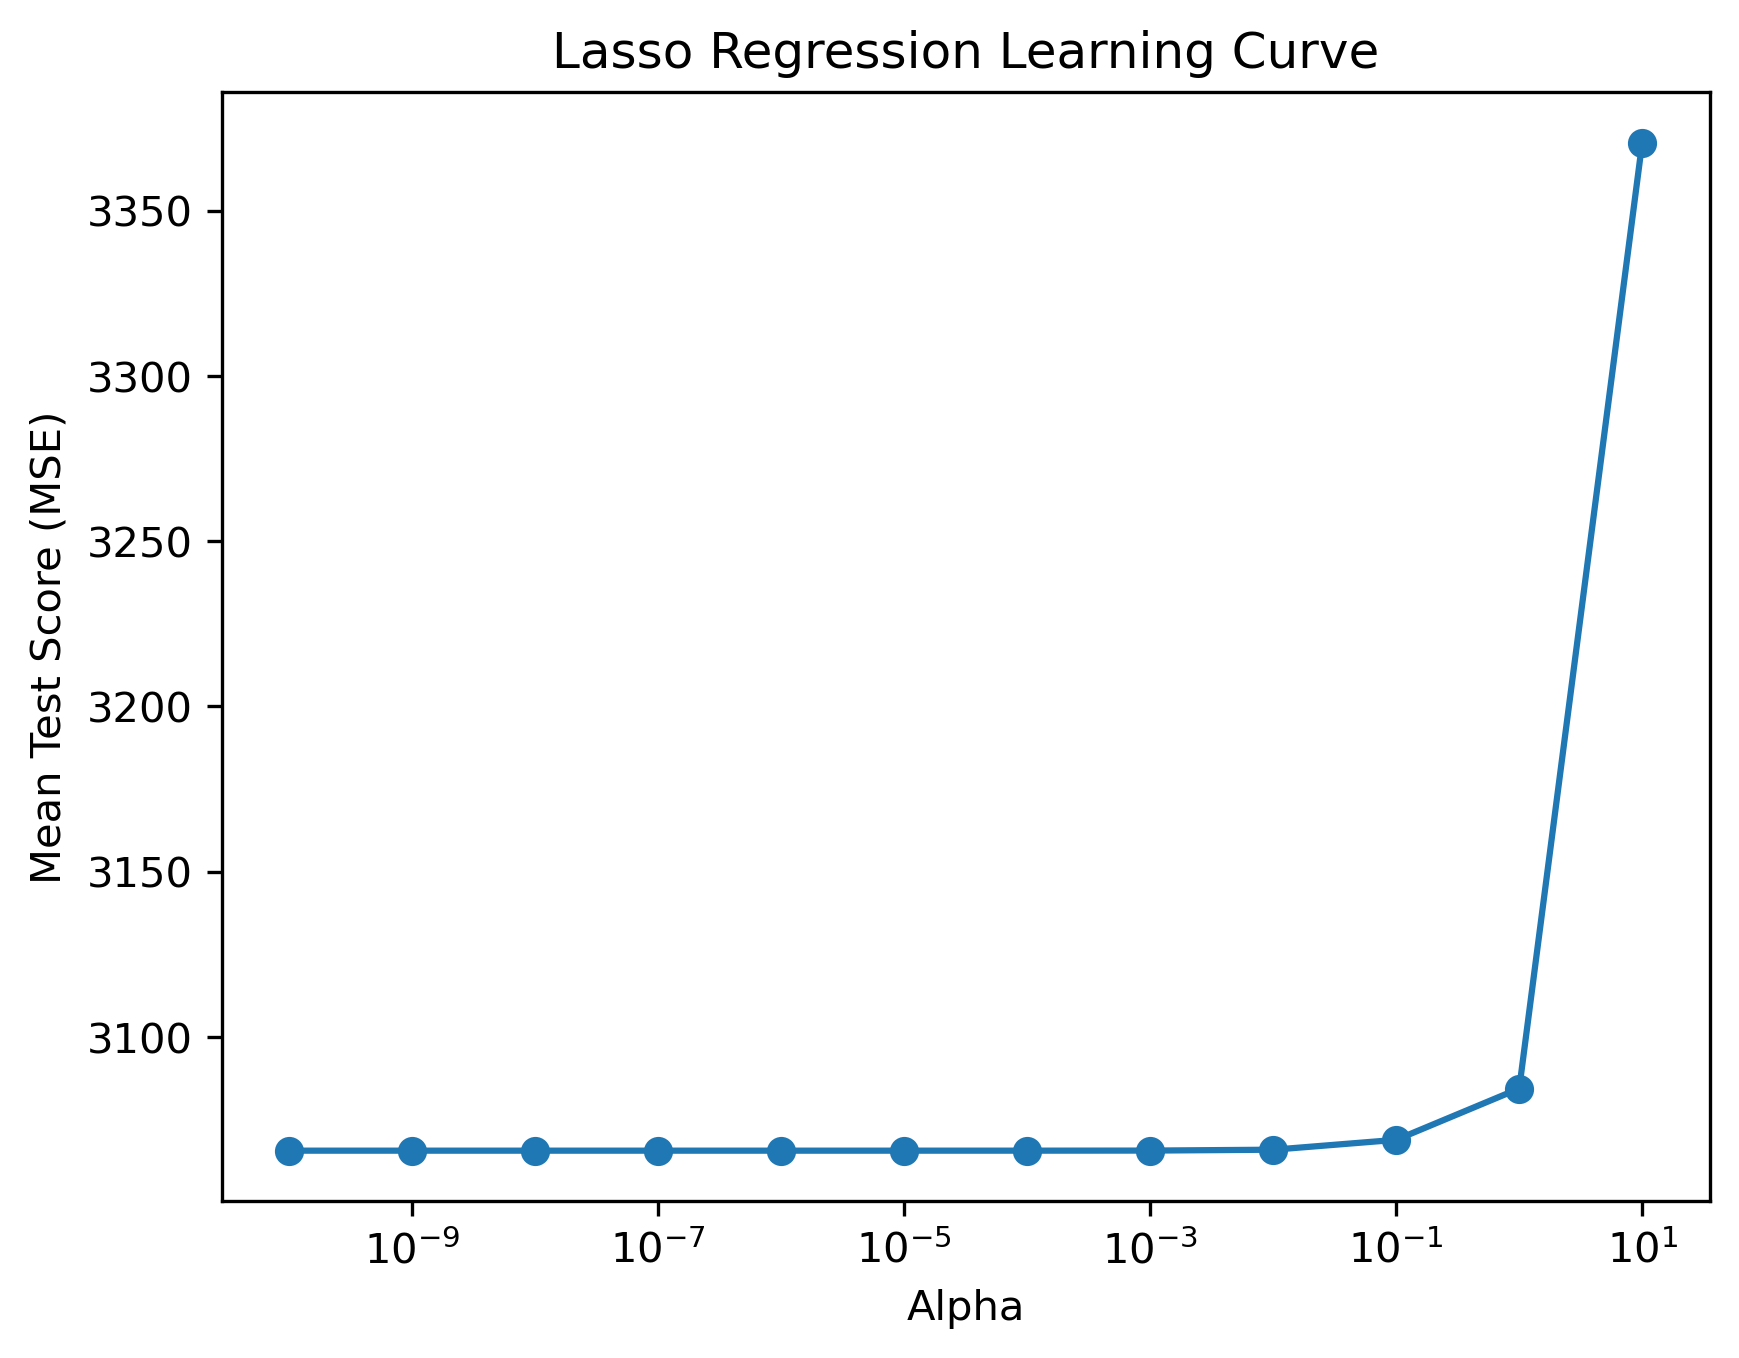

In [6]:
# 手动绘制学习曲线
import matplotlib.pyplot as plt
import numpy as np

# 提取参数和得分
alphas = cv_result['param_reg_lasso__alpha'].data
mean_test_scores = -cv_result['mean_test_score']  # 注意这里是负的，因为我们使用了neg_mean_squared_error

# 绘制学习曲线
plt.figure(dpi=300)
plt.plot(alphas, mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (MSE)')
plt.title('Lasso Regression Learning Curve')
plt.show()

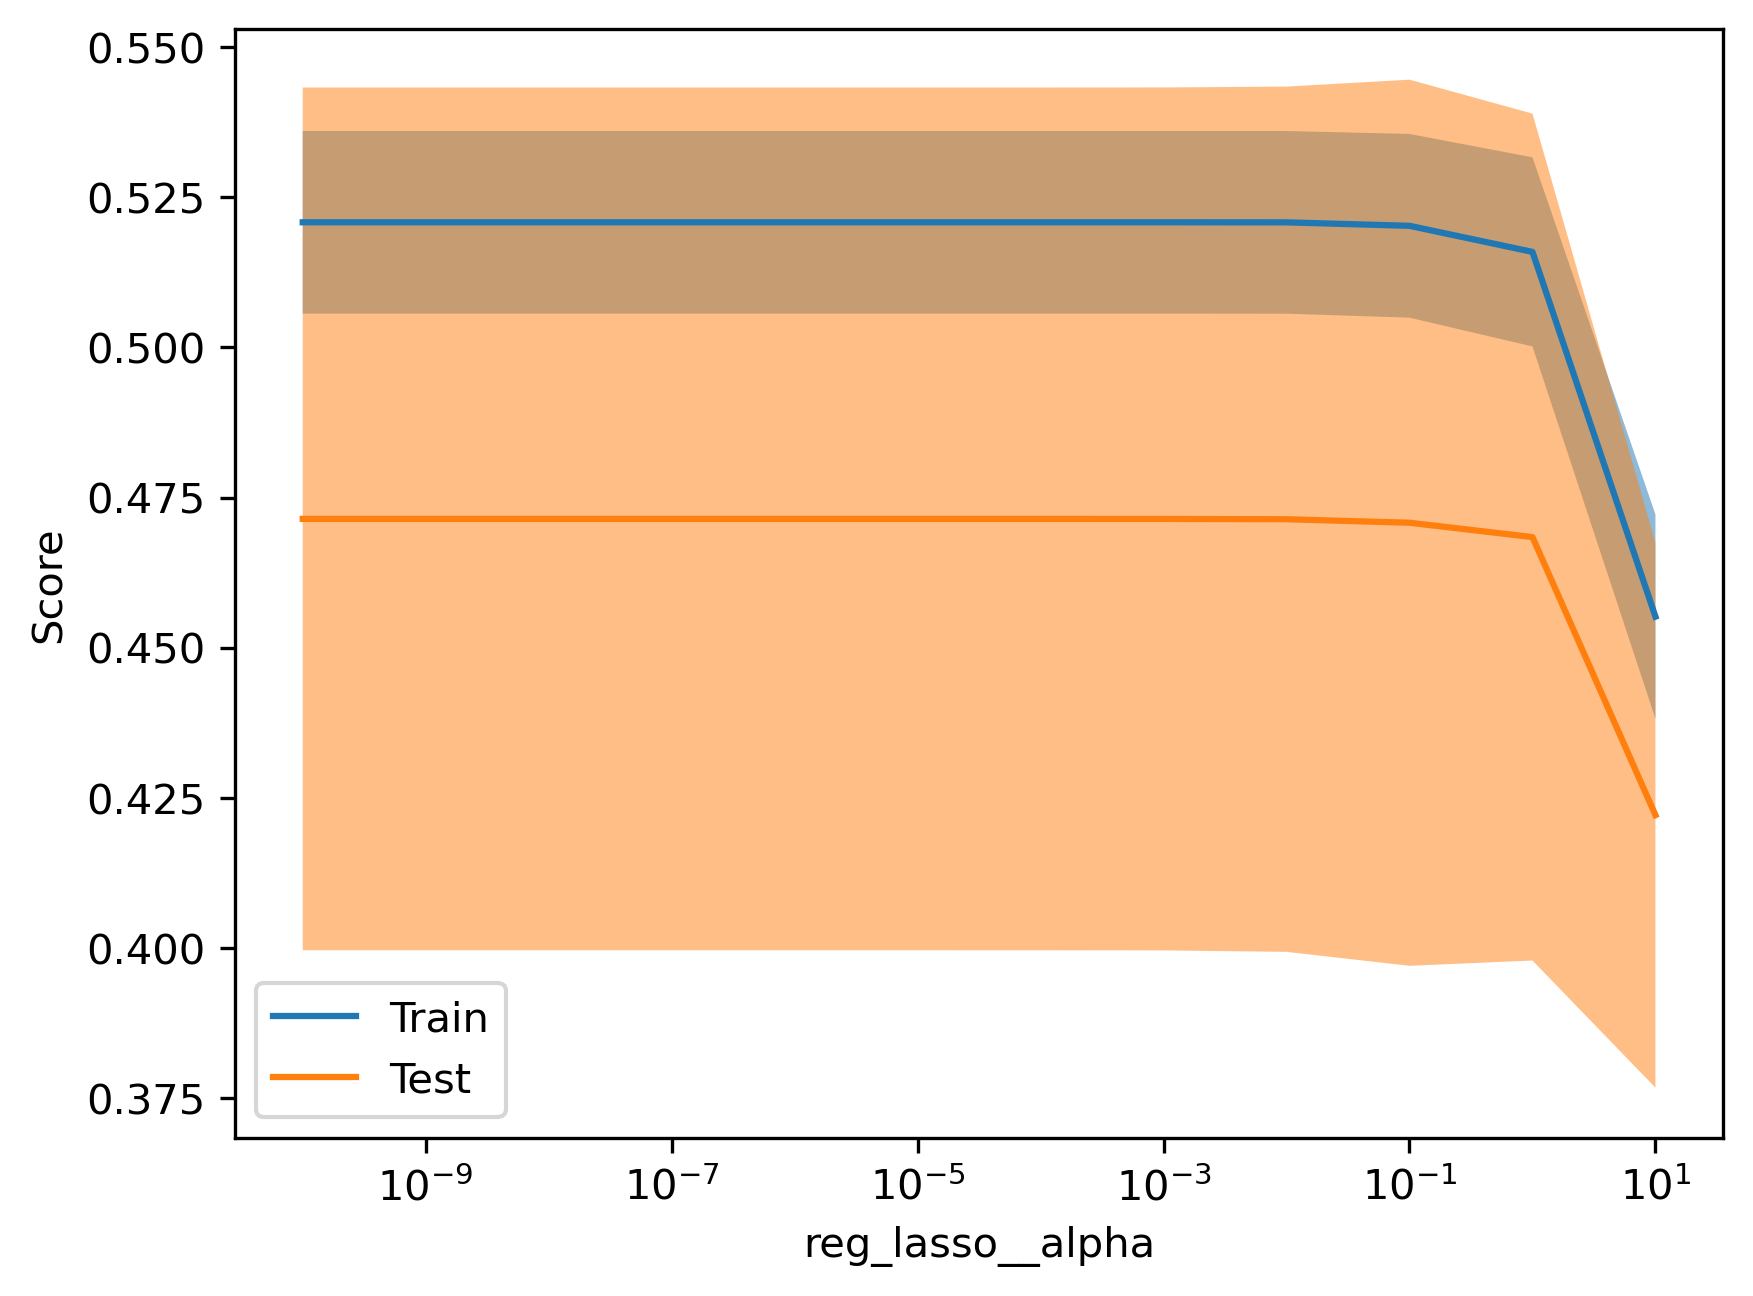

In [ ]:
# 调用API绘制验证曲线
from sklearn.model_selection import ValidationCurveDisplay
# 绘制验证曲线
plt.rcParams['figure.dpi'] = 300
ValidationCurveDisplay.from_estimator(
  reg_lasso, X_train, y_train,
  param_name='reg_lasso__alpha',
  param_range=np.logspace(-10, 1, 12)
)

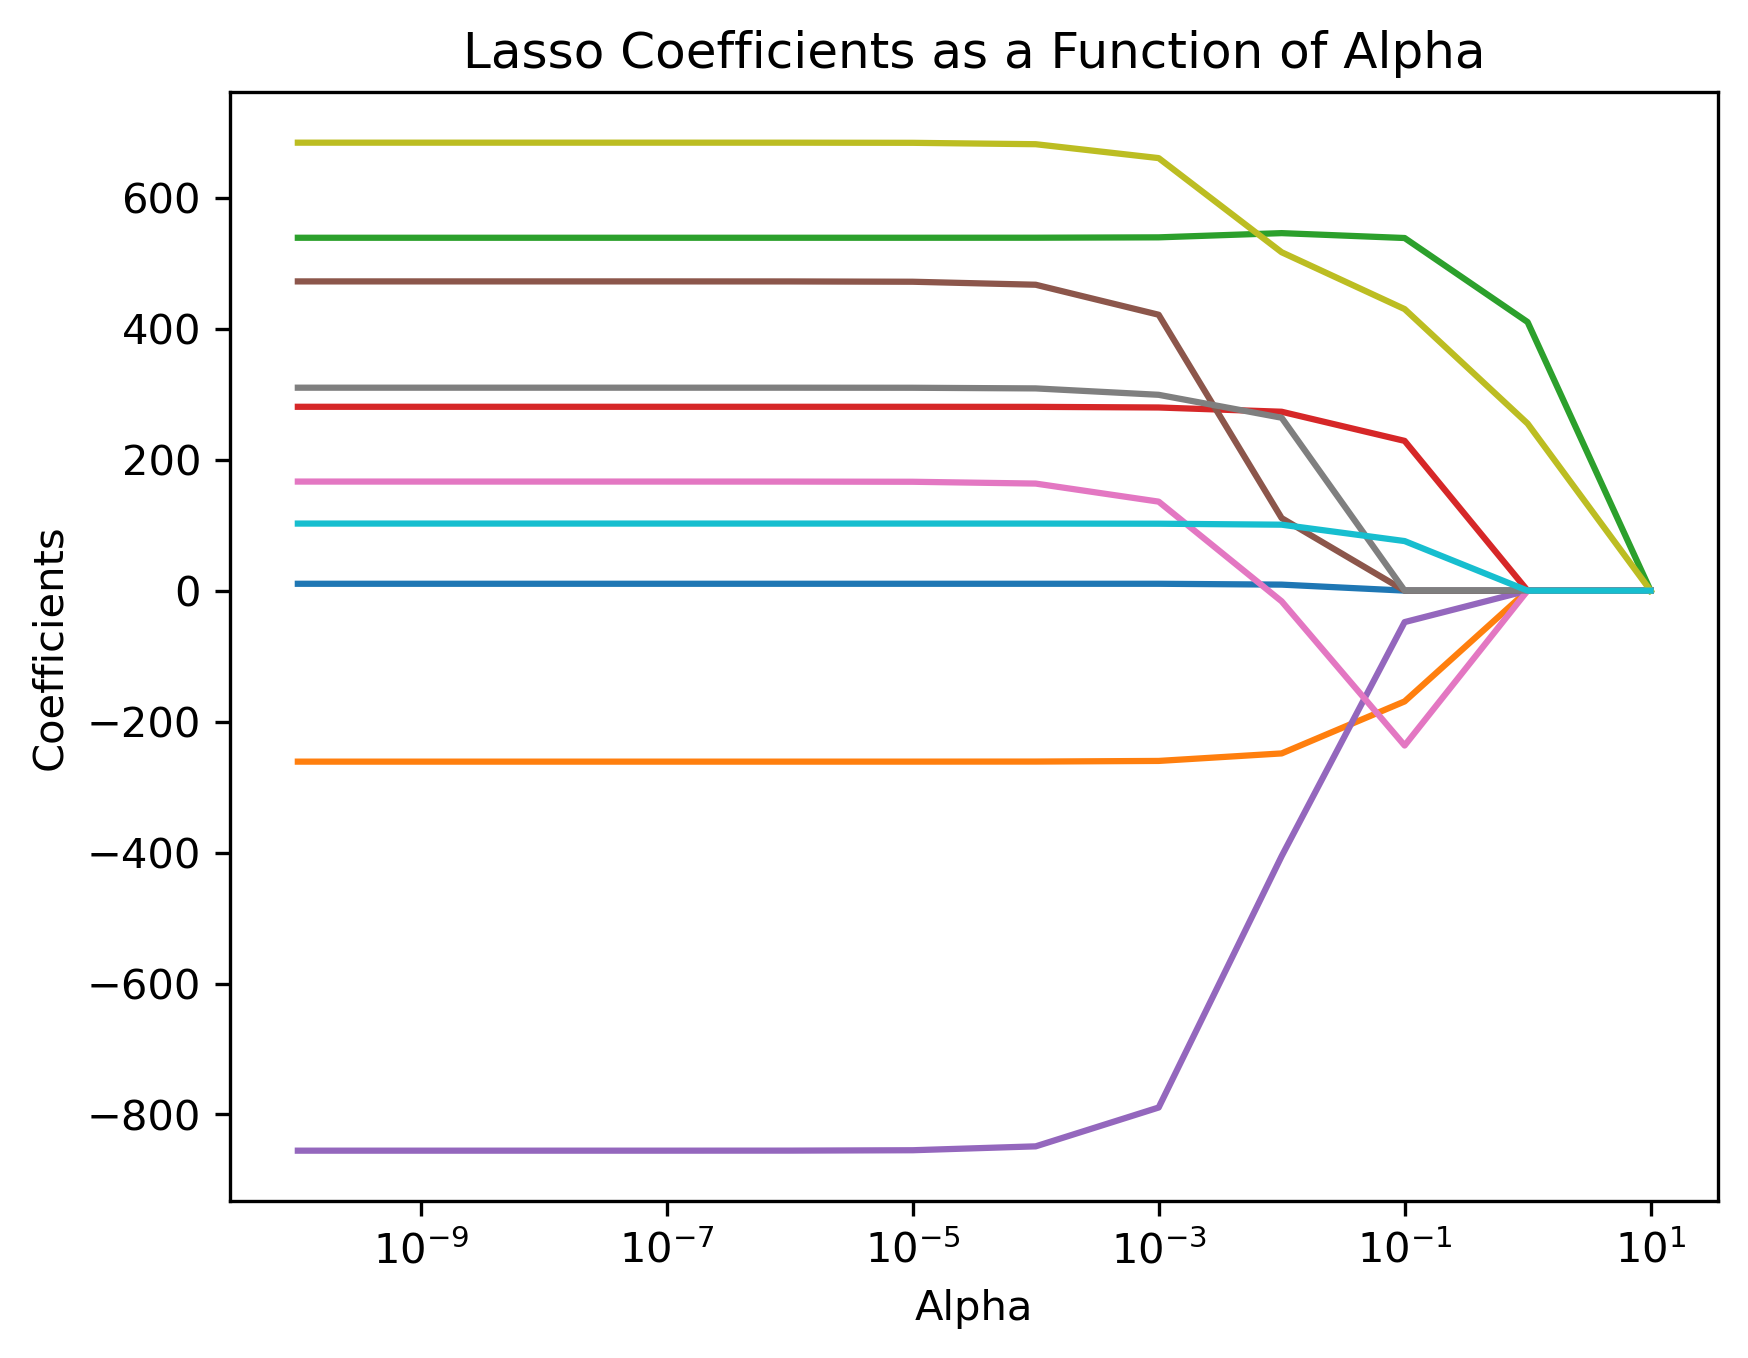

In [9]:
# 绘制系数随alpha变化的曲线
import matplotlib.pyplot as plt
import numpy as np

# 设定alpha值范围
alphas = np.logspace(-10, 1, 12)

# 存储系数
coefs = []

# 计算每个alpha值对应的系数
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
  
# 转换为numpy数组
coefs = np.array(coefs)

# 绘制系数曲线
plt.figure(dpi=300)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.axis('tight')
plt.show()

# 弹性网络回归

## 基础使用

In [11]:
# 测试弹性网回归
# 加载必要的包
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet

# 读取数据集
diabetes = load_diabetes()

# 定义弹性网回归器
reg_en = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 训练弹性网回归器
reg_en.fit(diabetes.data, diabetes.target)

# 预测结果
y_pred_en = reg_en.predict(diabetes.data)

# 计算得分
from sklearn.metrics import r2_score
r2_score(diabetes.target, y_pred_en)

0.008834748998299613

## 调参

In [ ]:
# 测试弹性网回归调参
# 加载必要的包
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# 读取数据集
diabetes = load_diabetes()

# 分割数据集
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义管道学习器
# 定义标准化器
scaler = StandardScaler()
# 定义弹性网回归器
reg_en = ElasticNet(max_iter=10000)  # 增加最大迭代次数以确保收敛
# 定义管道
pipe = Pipeline([
  ('scaler', scaler),
  ('reg_en', reg_en)
])

# 定义参数范围
param_grid = {
  'reg_en__alpha': np.logspace(-10, 1, 12),  # 使用logspace生成从10^-10到10^1的12个数
  'reg_en__l1_ratio': np.arange(0.1, 1, 10)  # l1_ratio的范围
}

# 定义网格搜索
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

# 训练网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
grid_search.best_params_

# {'reg_en__alpha': 0.0001, 'reg_en__l1_ratio': 0.1}

{'reg_en__alpha': 0.0001, 'reg_en__l1_ratio': 0.1}

In [18]:
# 传入参数
reg_en = grid_search.best_estimator_

# 预测结果
y_pred = reg_en.predict(X_test)

# 计算得分
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5078328093749099

In [ ]:
# 提取系数
reg_en["reg_en"].coef_

# array([  0.49136851, -12.4351619 ,  25.86806482,  13.46030351,
#        -41.75318499,  22.80783793,   7.80539702,  15.19227444,
#         32.72336664,   5.19720888])

array([  0.49136851, -12.4351619 ,  25.86806482,  13.46030351,
       -41.75318499,  22.80783793,   7.80539702,  15.19227444,
        32.72336664,   5.19720888])

# Logit回归

## 二项Logit回归

In [20]:
# 测试二项Logit回归
# 加载必要的包
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 生成二分类数据集
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义Logistic回归器
log_reg = LogisticRegression(max_iter=1000)

# 训练Logistic回归器
log_reg.fit(X_train, y_train)

# 预测结果
y_pred = log_reg.predict(X_test)

# 计算得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8366666666666667

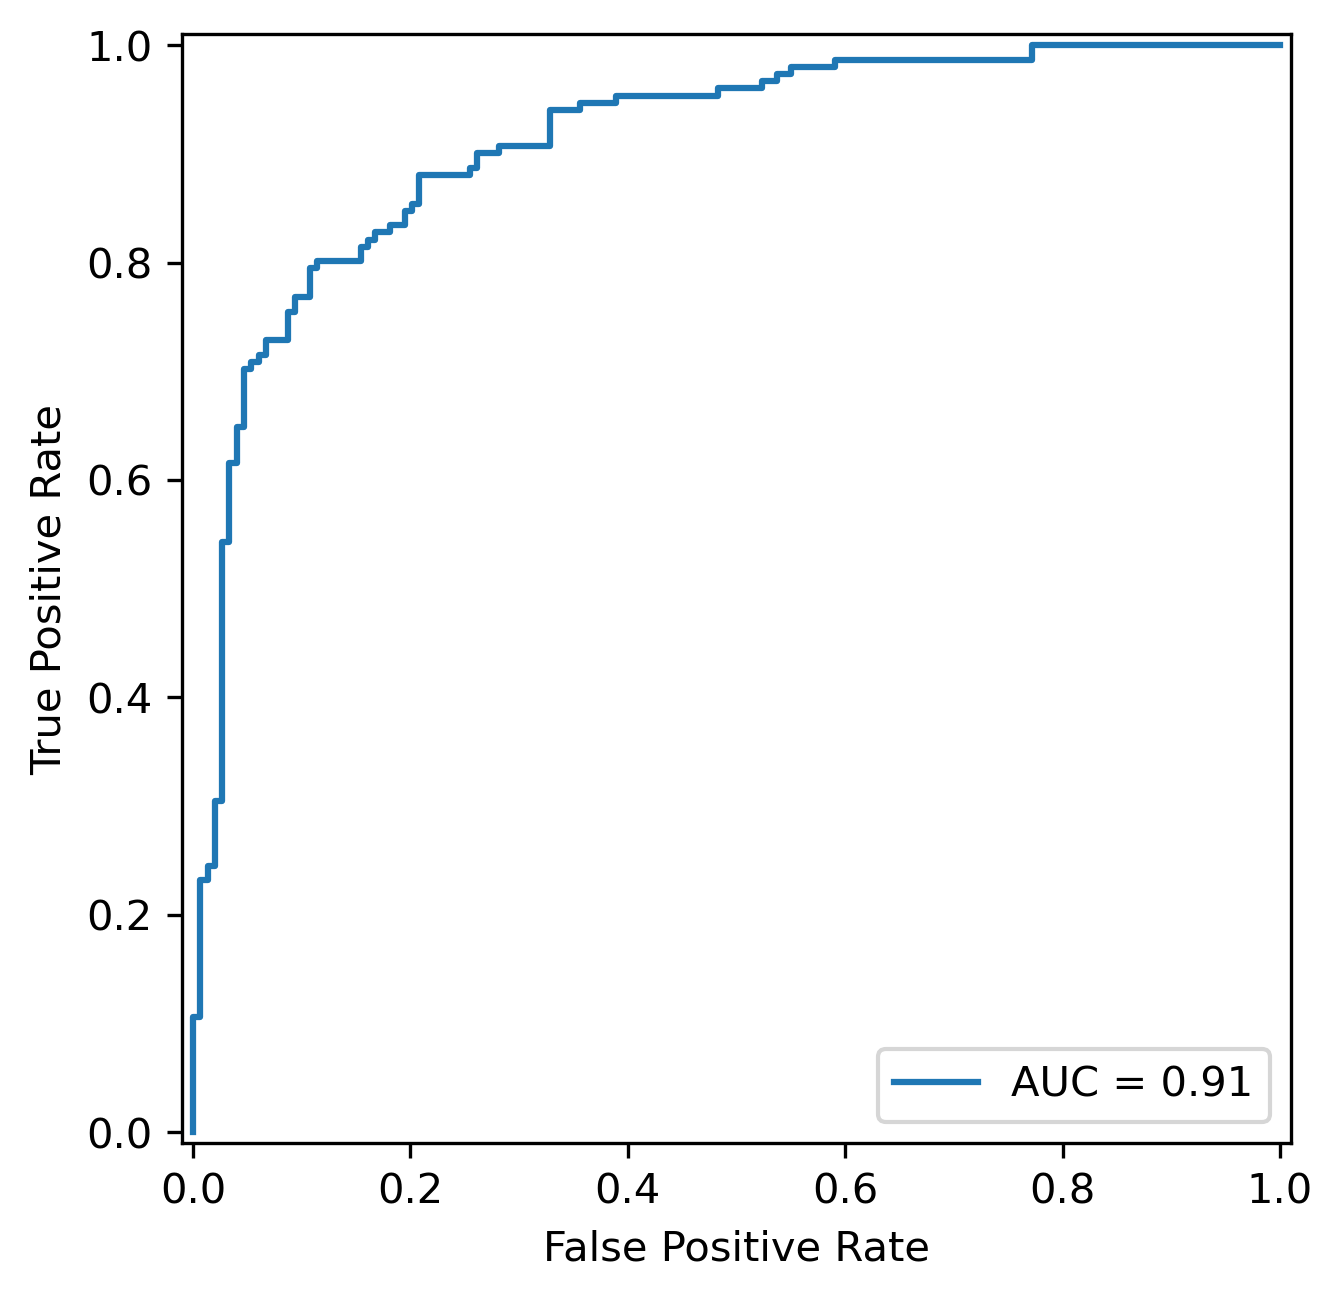

In [29]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# 计算ROC曲线
y_pred = log_reg.predict_proba(X_test) # 获取正类的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
# 绘制ROC曲线
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

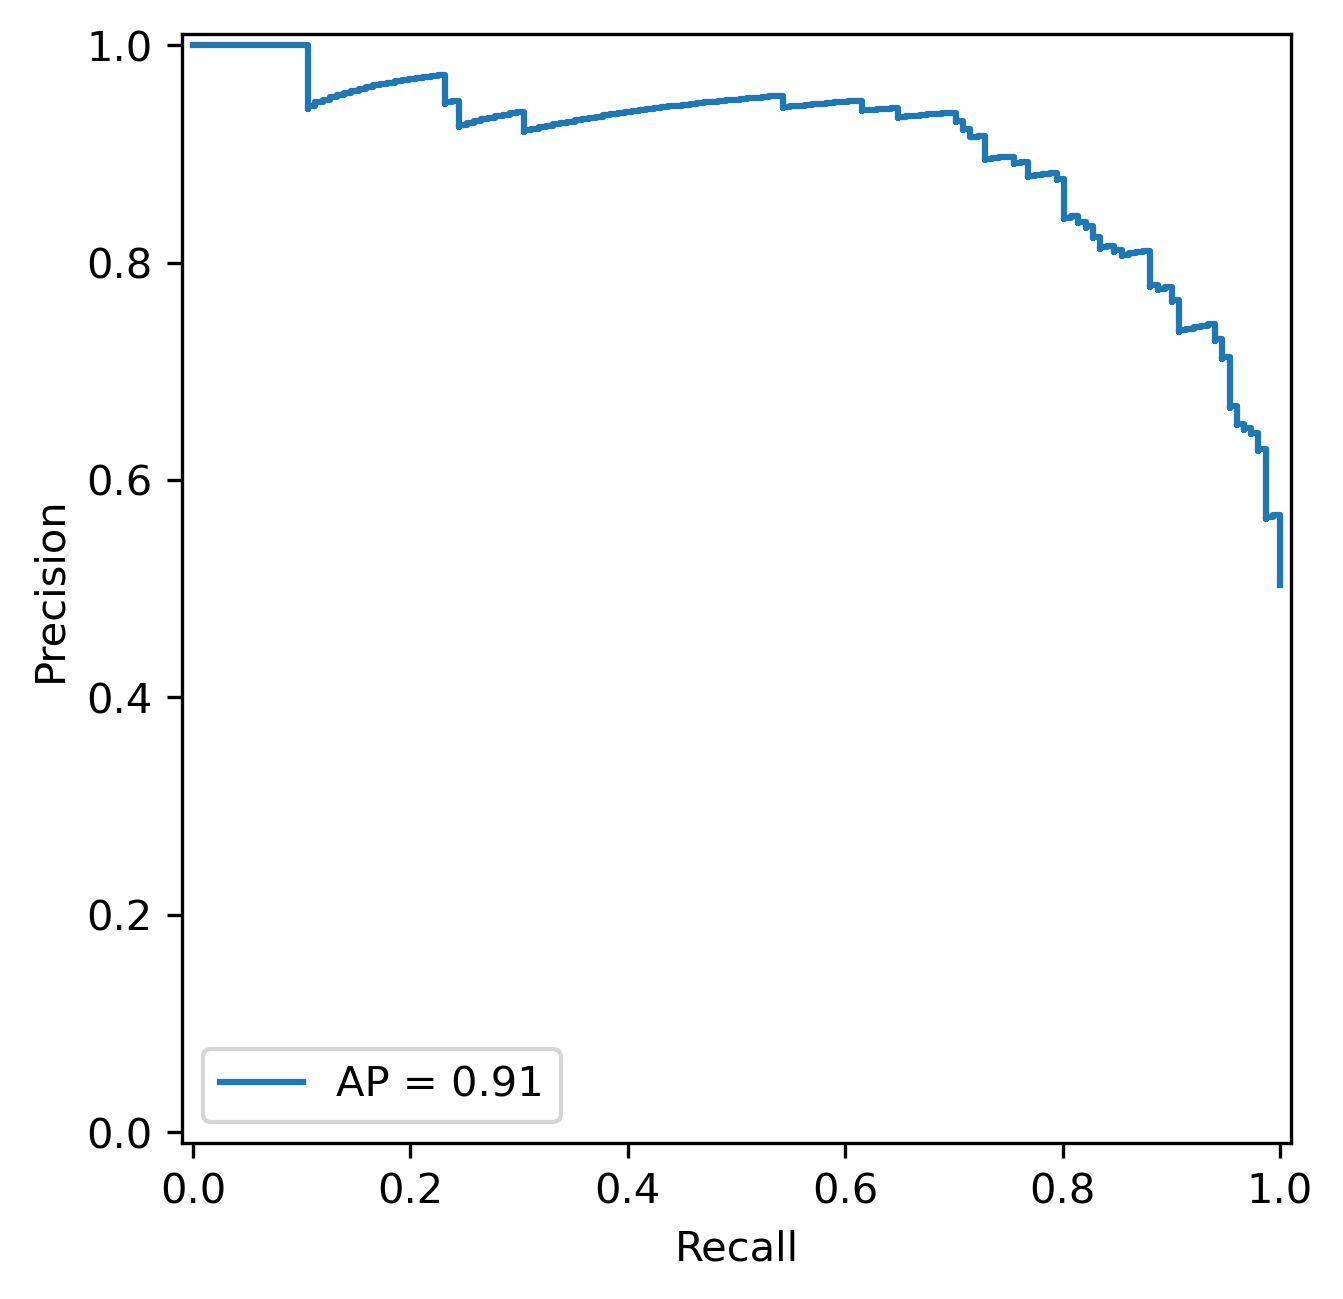

In [30]:
# 绘制PR曲线
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

# 计算PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred[:, 1])
average_precision = average_precision_score(y_test, y_pred[:, 1])
# 绘制PR曲线
PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot()
plt.show()

## 一对多Logit

In [ ]:
# 测试一对多Logit回归
# 加载必要的包
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 读取数据集
iris = load_iris()

# 分割数据集
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义Logistic回归器
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')

# 训练Logistic回归器
log_reg.fit(X_train, y_train)

# 预测结果
y_pred = log_reg.predict(X_test)

# 计算得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9555555555555556

In [35]:
# 测试一对多Logit回归
# 加载必要的包
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# 读取数据集
iris = load_iris()

# 分割数据集
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义Logistic回归器
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000, multi_class='ovr'))

# 训练Logistic回归器
log_reg.fit(X_train, y_train)

# 预测结果
y_pred = log_reg.predict(X_test)

# 计算得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9555555555555556

## 多项Logit回归

In [37]:
# 测试多项Logit回归
# 加载必要的包
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 读取数据集
iris = load_iris()
# 分割数据集
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义Logistic回归器
log_reg = LogisticRegression()

# 训练Logistic回归器
log_reg.fit(X_train, y_train)

# 预测结果
y_pred = log_reg.predict(X_test)

# 计算得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

## 正则化

In [39]:
# 测试L2正则化Logit回归
# 加载必要的包
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 读取数据集
iris = load_iris()
# 分割数据集
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 定义Logistic回归器
log_reg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# 训练Logistic回归器
log_reg.fit(X_train, y_train)

# 预测结果
y_pred = log_reg.predict(X_test)

# 计算得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

In [ ]:
# 查看系数
log_reg.coef_

# array([[-0.45799607,  0.8223622 , -2.31225851, -0.98187004],
#        [ 0.50923947, -0.22371392, -0.18962233, -0.81216269],
#        [-0.0512434 , -0.59864828,  2.50188084,  1.79403273]])

array([[-0.45799607,  0.8223622 , -2.31225851, -0.98187004],
       [ 0.50923947, -0.22371392, -0.18962233, -0.81216269],
       [-0.0512434 , -0.59864828,  2.50188084,  1.79403273]])

# GLM

In [42]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
reg.coef_
reg.intercept_

-0.7638091359123443